In [11]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [20]:
img_gen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True, rotation_range = 15, 
                             width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2,
                             horizontal_flip = True, vertical_flip = True, dtype = np.float32)
width = 224
height = 224
batch_size = 4

<ipython-input-21-c5741a12b670>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 5, 1)


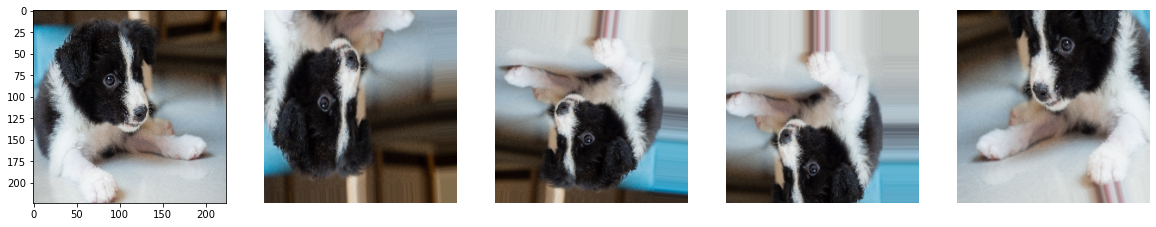

In [21]:
img = cv2.imread('Tano.jpg')
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_init = img.copy()
img = np.array(img, dtype = np.float32)

img_com = np.array([img, img, img, img], dtype = np.uint8)
batch_gen = img_gen.flow(img_com, batch_size = 4)
assert next(batch_gen).shape == (batch_size, width, height, 3)

plt.figure(figsize = (20, 10))
i = 1
for batch in batch_gen:
    plt.subplot(1, 5, 1)
    plt.imshow(img_init)
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0, :, :, :].astype(np.uint8))
    plt.imshow(batch[1, :, :, :].astype(np.uint8))
    plt.imshow(batch[2, :, :, :].astype(np.uint8))
    plt.imshow(batch[3, :, :, :].astype(np.uint8))
    plt.axis('off')
    i += 1
    if i > 4:
        break

In [23]:
from imgaug import augmenters as iaa

<ipython-input-29-d3dd335447a5>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 6, 1)


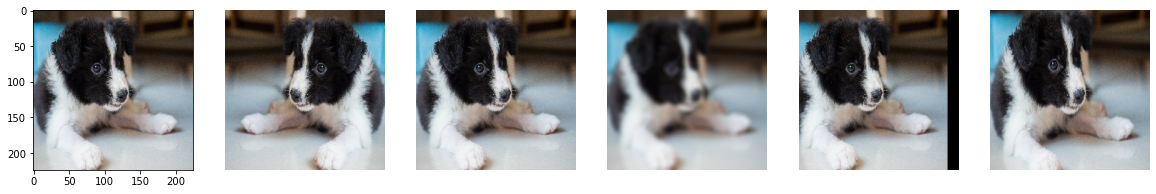

In [29]:
img = cv2.imread('Tano.jpg')
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_init = img.copy()
img = np.array(img, dtype = np.float32)

images = np.array([img, img, img, img, img], dtype = np.uint8)

flipper = iaa.Fliplr(1.0) #水平翻轉機率==1.0
images[0] = flipper.augment_image(img) 

blurer = iaa.GaussianBlur(3.0)
images[2] = blurer.augment_image(img) # 高斯模糊圖像( sigma of 3.0)

translater = iaa.Affine(translate_px={"x": -16}) #向左橫移16個像素
images[3] = translater.augment_image(img) 

scaler = iaa.Affine(scale={"y":(0.8, 1.2)}) # 縮放照片，區間(0.8-1.2倍)
images[4] = scaler.augment_image(img)

i=1
plt.figure(figsize=(20,20))
for image in images:
    plt.subplot(1, 6, 1)
    plt.imshow(img_init.astype(np.uint8))
    plt.subplot(1, 6, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    i+=1